# Using Spatial Correlation Analytics to the STKDE in the Contiguous United States
Shaohua Wang University of Illinois, Urbana-Champaign

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:

filename = './final_stkde.txt'

filename = './correlation_stkde.txt'


column_names = ['longitude', 'latitude', 'time', 'stkde']


column_names = ['fips', 'time','date',  'stkde']


sdf = pd.read_csv(filename, names=column_names)
sdf["value"] =  sdf["stkde"]*10000000000000
#sdf = pd.read_csv("./final_stkde.txt")

sdf

,fips,time,date,stkde,value
0,12011,44,2020-3-5,3.560652e-13,3.560652
1,12011,45,2020-3-6,1.096155e-12,10.961545
2,12011,46,2020-3-7,1.279327e-12,12.793266
3,12011,47,2020-3-8,9.092820e-13,9.092820
4,12011,48,2020-3-9,7.363889e-13,7.363889
...,...,...,...,...,...
50502,53009,71,2020-4-1,2.711618e-10,2711.618271
50503,53009,72,2020-4-2,3.039997e-10,3039.996968
50504,53009,73,2020-4-3,2.538458e-10,2538.457572
50505,53009,74,2020-4-4,1.755484e-10,1755.484423


In [3]:
sdf["value"].value_counts()

1.961278       7
5.535201       7
6.803239       6
2.289855       6
5.677453       6
              ..
349.701535     1
2759.519978    1
5012.344719    1
5996.893300    1
146.512026     1
Name: value, Length: 47656, dtype: int64

In [4]:
sdf["value"].describe().astype (float)

count     50507.000000
mean       4765.238338
std       29263.585234
min           0.006200
25%          34.384296
50%         246.658955
75%        1807.173471
max      765268.575226
Name: value, dtype: float64

In [5]:
sdf["time"].value_counts()

72    1661
73    1660
74    1657
75    1654
71    1654
      ... 
28      27
20      27
26      27
19      27
1       22
Name: time, Length: 74, dtype: int64

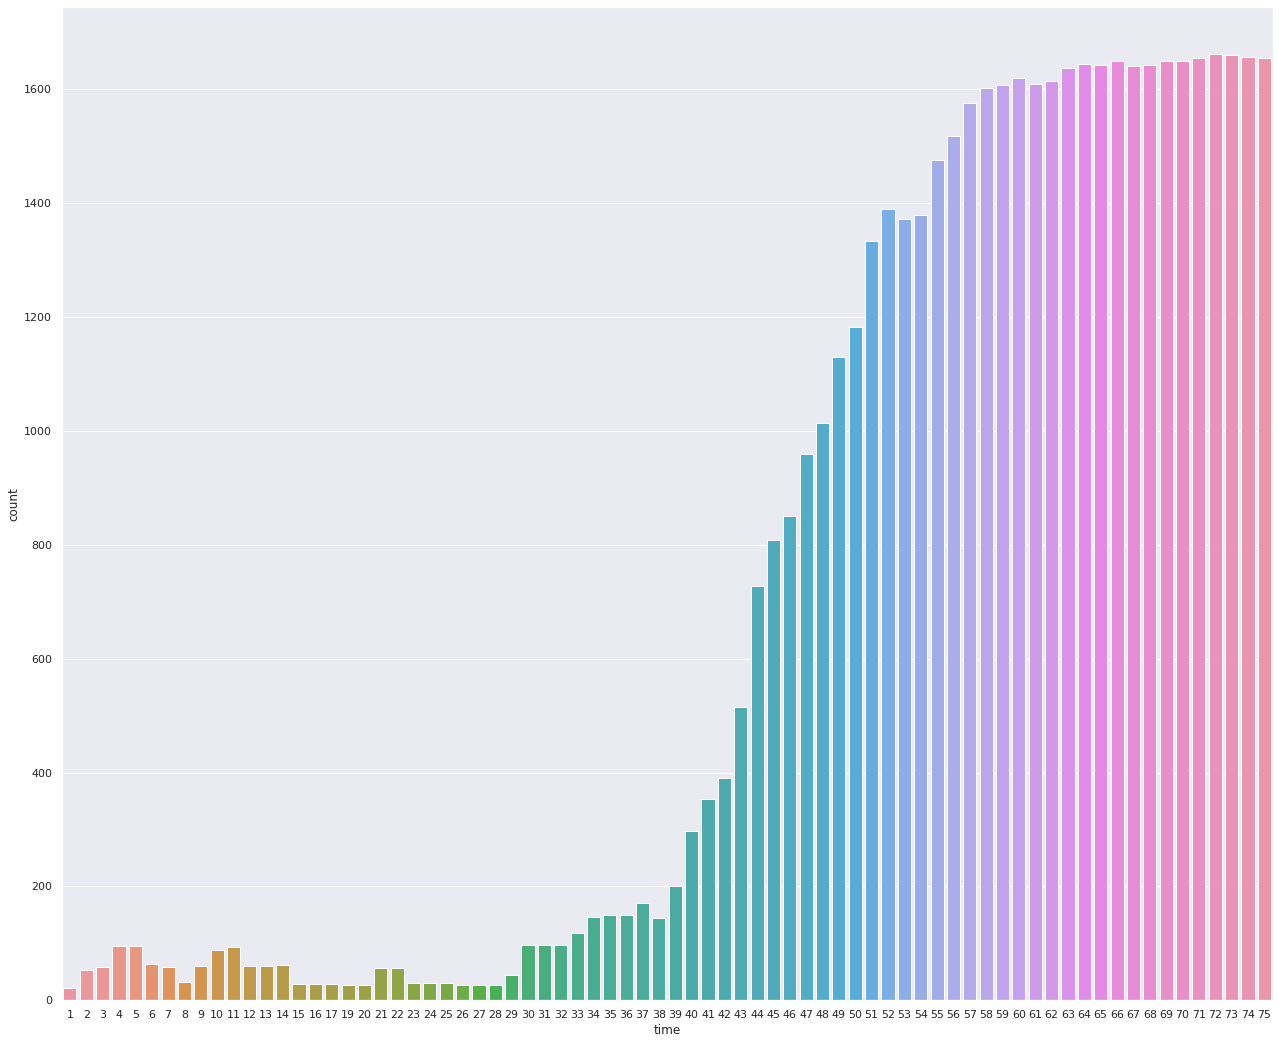

In [6]:
import matplotlib.pyplot as plt
import pandas

import seaborn as sns
from matplotlib import pyplot

sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
#a4_dims = (11.7, 8.27)
a4_dims = (21.7, 18.27)

fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x="time", data=sdf)

In [9]:
#sdf["time"].describe().astype (float)

In [7]:
%%time
df = gpd.read_file('us_census/counties.shp')
#df["fips"] = df["fips"].astype (int)

print (len(df))
#df = df[df["state"]!="Alaska" and df["state"]!="Hawaii" and df["county"]!="Unknown"]
#df = df[df["state"]!="Alaska"]
#df = df[df["state"]!="Hawaii"]
#df = df[df["county"]!="Unknown"]
#print (len(df))
df.head(5)

3102
CPU times: user 3.43 s, sys: 334 ms, total: 3.76 s
Wall time: 3.77 s


,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,BLACK,...,CROP_ACR07,AVG_SALE07,SQMI,Shape_Leng,Shape_Area,FIPS,fipsnew,2020-04-05,2020-03-29,geometry
0,Autauga,Alabama,01,001,54571,90.3,55939,92.59430917189999,42855.0,9643.0,...,42349.0,40.41,604.13,2.13793282267,0.150198352056,01001,01001,0.000000,0.000000,"MULTIPOLYGON (((-86.41130 32.42699, -86.41138 ..."
1,Baldwin,Alabama,01,003,182265,111.1,190116,115.901068687,156153.0,17105.0,...,103036.0,88.09,1640.33,6.69300035927,0.400159431623,01003,01003,0.000000,0.000000,"MULTIPOLYGON (((-87.55692 30.28155, -87.55693 ..."
2,Barbour,Alabama,01,005,27457,30.4,27310,30.1938108768,13180.0,12875.0,...,56934.0,114.63,904.49,2.69097504942,0.223267704167,01005,01005,0.000000,0.000000,"POLYGON ((-85.25782 32.14797, -85.25835 32.146..."
3,Bibb,Alabama,01,007,22915,36.6,23106,36.8999329266,17381.0,5047.0,...,8619.0,-99.00,626.18,1.89516927667,0.156476914379,01007,01007,4491.467875,4491.467875,"POLYGON ((-87.02587 33.22258, -87.02585 33.220..."
4,Blount,Alabama,01,009,57322,88.1,58107,89.3088237554,53068.0,761.0,...,46735.0,113.33,650.63,2.45274784372,0.164406638348,01009,01009,0.000000,0.000000,"MULTIPOLYGON (((-86.83831 33.95018, -86.83833 ..."


In [8]:
%%time
df['fipsnew'] = df['FIPS']
for index, row in df.iterrows():   
    if (row["NAME"]=="New York"):
        ## replace new york city fips with 00000
        df['fipsnew'][index] = "00000"
    elif (row["NAME"]=="Kansas City"):
        ## replace kansas city fips with 00001
        df['fipsnew'][index] = "00001"
    elif (row["NAME"]!="Alaska" and row["NAME"]!="Hawaii" and row["NAME"]!="Hawaii" and row["NAME"]!="Unknown"):
        fips = str(int(row["FIPS"]))
        if (len(fips)!=5):
            fips = "0"+fips
        df['fipsnew'][index] = fips

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


CPU times: user 1.35 s, sys: 119 ms, total: 1.47 s
Wall time: 1.41 s


In [9]:
df.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,BLACK,...,CROP_ACR07,AVG_SALE07,SQMI,Shape_Leng,Shape_Area,FIPS,fipsnew,2020-04-05,2020-03-29,geometry
0,Autauga,Alabama,01,001,54571,90.3,55939,92.59430917189999,42855.0,9643.0,...,42349.0,40.41,604.13,2.13793282267,0.150198352056,01001,01001,0.000000,0.000000,"MULTIPOLYGON (((-86.41130 32.42699, -86.41138 ..."
1,Baldwin,Alabama,01,003,182265,111.1,190116,115.901068687,156153.0,17105.0,...,103036.0,88.09,1640.33,6.69300035927,0.400159431623,01003,01003,0.000000,0.000000,"MULTIPOLYGON (((-87.55692 30.28155, -87.55693 ..."
2,Barbour,Alabama,01,005,27457,30.4,27310,30.1938108768,13180.0,12875.0,...,56934.0,114.63,904.49,2.69097504942,0.223267704167,01005,01005,0.000000,0.000000,"POLYGON ((-85.25782 32.14797, -85.25835 32.146..."
3,Bibb,Alabama,01,007,22915,36.6,23106,36.8999329266,17381.0,5047.0,...,8619.0,-99.00,626.18,1.89516927667,0.156476914379,01007,01007,4491.467875,4491.467875,"POLYGON ((-87.02587 33.22258, -87.02585 33.220..."
4,Blount,Alabama,01,009,57322,88.1,58107,89.3088237554,53068.0,761.0,...,46735.0,113.33,650.63,2.45274784372,0.164406638348,01009,01009,0.000000,0.000000,"MULTIPOLYGON (((-86.83831 33.95018, -86.83833 ..."


In [10]:
def format_num(num):
    if len(num) < 2:
        return "0" + num
    return num

In [12]:
print(len(df))
for j in range(0, len(df)):
    fips = '12011'
    if (df['fipsnew'][j]==fips):
        print (j,fips,df['fipsnew'][j],df['NAME'][j])
        break


3102
296 12011 12011 Broward


In [13]:
df["2020-04-04"] = pd.Series([0.0000000 for x in range(len(df.index))], index=df.index)
df

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,BLACK,...,AVG_SALE07,SQMI,Shape_Leng,Shape_Area,FIPS,fipsnew,2020-04-05,2020-03-29,geometry,2020-04-04
0,Autauga,Alabama,01,001,54571,90.3,55939,92.59430917189999,42855.0,9643.0,...,40.41,604.13,2.13793282267,0.150198352056,01001,01001,0.000000,0.000000,"MULTIPOLYGON (((-86.41130 32.42699, -86.41138 ...",0.0
1,Baldwin,Alabama,01,003,182265,111.1,190116,115.901068687,156153.0,17105.0,...,88.09,1640.33,6.69300035927,0.400159431623,01003,01003,0.000000,0.000000,"MULTIPOLYGON (((-87.55692 30.28155, -87.55693 ...",0.0
2,Barbour,Alabama,01,005,27457,30.4,27310,30.1938108768,13180.0,12875.0,...,114.63,904.49,2.69097504942,0.223267704167,01005,01005,0.000000,0.000000,"POLYGON ((-85.25782 32.14797, -85.25835 32.146...",0.0
3,Bibb,Alabama,01,007,22915,36.6,23106,36.8999329266,17381.0,5047.0,...,-99.00,626.18,1.89516927667,0.156476914379,01007,01007,4491.467875,4491.467875,"POLYGON ((-87.02587 33.22258, -87.02585 33.220...",0.0
4,Blount,Alabama,01,009,57322,88.1,58107,89.3088237554,53068.0,761.0,...,113.33,650.63,2.45274784372,0.164406638348,01009,01009,0.000000,0.000000,"MULTIPOLYGON (((-86.83831 33.95018, -86.83833 ...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,Sweetwater,Wyoming,56,037,43806,4.2,45509,4.33786320037,38748.0,438.0,...,59.45,10491.11,7.66127847311,2.9372614468,56037,56037,185.545381,185.545381,"POLYGON ((-109.98736 42.26957, -109.97459 42.2...",0.0
3098,Teton,Wyoming,56,039,21294,5.0,22666,5.37493656598,18821.0,49.0,...,50.93,4216.98,5.16368096383,1.22422726685,56039,56039,412.687581,412.687581,"MULTIPOLYGON (((-110.20193 44.32141, -110.2018...",0.0
3099,Uinta,Wyoming,56,041,21118,10.1,21533,10.3148636932,19514.0,55.0,...,78.67,2087.57,3.15852189339,0.581166292191,56041,56041,3603.393901,3603.393901,"POLYGON ((-111.04584 41.57985, -111.04413 41.5...",0.0
3100,Washakie,Wyoming,56,043,8533,3.8,8668,3.86494970393,7795.0,22.0,...,184.82,2242.72,4.25104239808,0.650749649111,56043,56043,230.023319,230.023319,"POLYGON ((-108.52095 44.16834, -108.51328 44.1...",0.0


In [14]:
%%time
df["2020-03-28"] = pd.Series([0.0000000 for x in range(len(df.index))], index=df.index)
df["2020-03-21"] = pd.Series([0.0000000 for x in range(len(df.index))], index=df.index)
df["2020-03-14"] = pd.Series([0.0000000 for x in range(len(df.index))], index=df.index)
df

CPU times: user 2.96 ms, sys: 2.65 ms, total: 5.61 ms
Wall time: 5.12 ms


,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,BLACK,...,Shape_Area,FIPS,fipsnew,2020-04-05,2020-03-29,geometry,2020-04-04,2020-03-28,2020-03-21,2020-03-14
0,Autauga,Alabama,01,001,54571,90.3,55939,92.59430917189999,42855.0,9643.0,...,0.150198352056,01001,01001,0.000000,0.000000,"MULTIPOLYGON (((-86.41130 32.42699, -86.41138 ...",0.0,0.0,0.0,0.0
1,Baldwin,Alabama,01,003,182265,111.1,190116,115.901068687,156153.0,17105.0,...,0.400159431623,01003,01003,0.000000,0.000000,"MULTIPOLYGON (((-87.55692 30.28155, -87.55693 ...",0.0,0.0,0.0,0.0
2,Barbour,Alabama,01,005,27457,30.4,27310,30.1938108768,13180.0,12875.0,...,0.223267704167,01005,01005,0.000000,0.000000,"POLYGON ((-85.25782 32.14797, -85.25835 32.146...",0.0,0.0,0.0,0.0
3,Bibb,Alabama,01,007,22915,36.6,23106,36.8999329266,17381.0,5047.0,...,0.156476914379,01007,01007,4491.467875,4491.467875,"POLYGON ((-87.02587 33.22258, -87.02585 33.220...",0.0,0.0,0.0,0.0
4,Blount,Alabama,01,009,57322,88.1,58107,89.3088237554,53068.0,761.0,...,0.164406638348,01009,01009,0.000000,0.000000,"MULTIPOLYGON (((-86.83831 33.95018, -86.83833 ...",0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,Sweetwater,Wyoming,56,037,43806,4.2,45509,4.33786320037,38748.0,438.0,...,2.9372614468,56037,56037,185.545381,185.545381,"POLYGON ((-109.98736 42.26957, -109.97459 42.2...",0.0,0.0,0.0,0.0
3098,Teton,Wyoming,56,039,21294,5.0,22666,5.37493656598,18821.0,49.0,...,1.22422726685,56039,56039,412.687581,412.687581,"MULTIPOLYGON (((-110.20193 44.32141, -110.2018...",0.0,0.0,0.0,0.0
3099,Uinta,Wyoming,56,041,21118,10.1,21533,10.3148636932,19514.0,55.0,...,0.581166292191,56041,56041,3603.393901,3603.393901,"POLYGON ((-111.04584 41.57985, -111.04413 41.5...",0.0,0.0,0.0,0.0
3100,Washakie,Wyoming,56,043,8533,3.8,8668,3.86494970393,7795.0,22.0,...,0.650749649111,56043,56043,230.023319,230.023319,"POLYGON ((-108.52095 44.16834, -108.51328 44.1...",0.0,0.0,0.0,0.0


In [20]:
%%time
iicnt = 0
jjcnt = 0
for i in range(0, len(sdf)):
#for i in range(0, 1):
    #dates = sdf["date"]
    #print (dates)
    #continue
    #fips = 33249
    #date = "2020-04-04"
    
    ttime = sdf["time"][i]
    #if (ttime!=74):
    #if (ttime!=67):
    #if (ttime!=60):
    if (ttime!=53):
        continue
    iicnt = iicnt+1
    fips = sdf["fips"][i]
    date = sdf["date"][i]
    
    value = sdf["value"][i]
    
    mon = (date.split("-")[1])
    day = (date.split("-")[2])
    
    mon = format_num(mon)
    day = format_num(day)
    
    datanew ="2020-"+mon+"-"+day
    
    if (len(str(fips))!=5):
        fips = "0"+str(fips)
 
    print (fips,datanew)
    
    for j in range(0, len(df)):
        if (df['fipsnew'][j]==str(fips)):
            jjcnt = jjcnt+1
            print (j,df['fipsnew'][j],df['NAME'][j],value)
            #df["2020-04-05"][j] = value
            df[datanew][j] = value
            break
            

print (iicnt,jjcnt)

12011 2020-03-14
296 12011 Broward 143.45154348569423
12011 2020-03-14
296 12011 Broward 430.2617474980009
12011 2020-03-14
296 12011 Broward 595.5810682590871
12011 2020-03-14
296 12011 Broward 644.7499096845471
12021 2020-03-14
301 12021 Collier 546.6077893819921
12071 2020-03-14
325 12071 Lee 282.1282611450733
12071 2020-03-14
325 12071 Lee 49.62828009606873
12115 2020-03-14
348 12115 Sarasota 4.9307524756532395
12085 2020-03-14
332 12085 Martin 89.9866040596339
12085 2020-03-14
332 12085 Martin 377.70328867474075
12099 2020-03-14
340 12099 Palm Beach 566.9430637955921
12043 2020-03-14
311 12043 Glades 649.7173143172308
12015 2020-03-14
298 12015 Charlotte 553.6014215822111
12115 2020-03-14
348 12115 Sarasota 278.20447281527004
12115 2020-03-14
348 12115 Sarasota 81.34259743212368
12103 2020-03-14
342 12103 Pinellas 27.618431888576655
48007 2020-03-14
2485 48007 Aransas 0.5892333117122859
12111 2020-03-14
346 12111 St. Lucie 8.951197096987325
12111 2020-03-14
346 12111 St. Lucie 197

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


346 12111 St. Lucie 412.3071550275979
12093 2020-03-14
337 12093 Okeechobee 503.07646800105476
12049 2020-03-14
314 12049 Hardee 414.7755778506039
12081 2020-03-14
330 12081 Manatee 189.13695351128376
12103 2020-03-14
342 12103 Pinellas 98.09613876639362
12103 2020-03-14
342 12103 Pinellas 38.11912771370154
22075 2020-03-14
1116 22075 Plaquemines 47.69776086330413
22075 2020-03-14
1116 22075 Plaquemines 106.42339933316157
22109 2020-03-14
1133 22109 Terrebonne 99.69401634704094
22109 2020-03-14
1133 22109 Terrebonne 23.354885070613626
22045 2020-03-14
1101 22045 Iberia 3.6000873264336093
48167 2020-03-14
2565 48167 Galveston 5.758912332947858
48167 2020-03-14
2565 48167 Galveston 31.851017625866707
48321 2020-03-14
2642 48321 Matagorda 62.464523245681626
48007 2020-03-14
2485 48007 Aransas 52.32865368334533
48355 2020-03-14
2659 48355 Nueces 20.194991910950534
48249 2020-03-14
2606 48249 Jim Wells 7.655501961127875
48131 2020-03-14
2547 48131 Duval 8.498837245713348
48479 2020-03-14
27

2594 48225 Houston 206.07586876063147
48161 2020-03-14
2562 48161 Freestone 305.1475461190876
48309 2020-03-14
2636 48309 McLennan 305.9985516669894
48099 2020-03-14
2531 48099 Coryell 232.2136993826427
48333 2020-03-14
2648 48333 Mills 125.03124674978726
48095 2020-03-14
2529 48095 Concho 24.340400872760288
48109 2020-03-14
2536 48109 Culberson 12.235052510625007
48229 2020-03-14
2596 48229 Hudspeth 23.761235825789267
48141 2020-03-14
2552 48141 El Paso 28.76579769272833
48141 2020-03-14
2552 48141 El Paso 27.248738111442183
35029 2020-03-14
1774 35029 Luna 19.61914581355211
35023 2020-03-14
1770 35023 Hidalgo 13.956072233169454
04003 2020-03-14
68 04003 Cochise 21.201796899692287
04023 2020-03-14
79 04023 Santa Cruz 32.92795803515413
04023 2020-03-14
79 04023 Santa Cruz 37.30307269797648
04019 2020-03-14
77 04019 Pima 33.85995328809402
04019 2020-03-14
77 04019 Pima 25.59735320545703
04027 2020-03-14
81 04027 Yuma 5.913722596656799
04027 2020-03-14
81 04027 Yuma 41.65117127363921
060

198 06083 Santa Barbara 3.981754868497327
37055 2020-03-14
1876 37055 Dare 1.1672977523357222
37031 2020-03-14
1864 37031 Carteret 15.489909346181294
37031 2020-03-14
1864 37031 Carteret 55.734127736945766
37133 2020-03-14
1915 37133 Onslow 156.57848158075333
37141 2020-03-14
1919 37141 Pender 221.2977980715727
37155 2020-03-14
1926 37155 Robeson 284.351210404372
45031 2020-03-14
2290 45031 Darlington 268.9253379930016
45057 2020-03-14
2303 45057 Lancaster 200.6912660972745
45087 2020-03-14
2318 45087 Union 172.5043097313224
45007 2020-03-14
2278 45007 Anderson 471.9450647820698
13137 2020-03-14
425 13137 Habersham 741.9345628860749
13227 2020-03-14
469 13227 Pickens 859.4556923832112
13055 2020-03-14
384 13055 Chattooga 935.6599716672264
01095 2020-03-14
47 01095 Marshall 814.8046101085013
01079 2020-03-14
39 01079 Lawrence 447.1145106890627
01059 2020-03-14
29 01059 Franklin 277.6815312095531
28145 2020-03-14
1439 28145 Union 96.91836966619047
28137 2020-03-14
1435 28137 Tate 52.1140

2879 51550 Chesapeake 229.0990345333333
51175 2020-03-14
2862 51175 Southampton 320.01271601893103
51117 2020-03-14
2836 51117 Mecklenburg 313.8264700162305
51083 2020-03-14
2819 51083 Halifax 218.41281195724028
51690 2020-03-14
2896 51690 Martinsville 134.3906119589999
51640 2020-03-14
2888 51640 Galax 58.317016702936016
51191 2020-03-14
2869 51191 Washington 49.68263859876581
51169 2020-03-14
2859 51169 Scott 64.79136244940428
21013 2020-03-14
965 21013 Bell 105.73787007020378
21147 2020-03-14
1032 21147 McCreary 193.01598744357602
21057 2020-03-14
987 21057 Cumberland 341.3958838315877
21003 2020-03-14
960 21003 Allen 368.78762878762325
21219 2020-03-14
1068 21219 Todd 333.24442251962654
21221 2020-03-14
1069 21221 Trigg 240.1215574375645
21105 2020-03-14
1011 21105 Hickman 107.49275337767389
29207 2020-03-14
1548 29207 Stoddard 22.335670565723124
29181 2020-03-14
1536 29181 Ripley 17.318926058566444
29149 2020-03-14
1521 29149 Oregon 28.804032077345255
29153 2020-03-14
1523 29153 O

1178 24041 Talbot 1207.7364123759457
51059 2020-03-14
2807 51059 Fairfax County 1075.611266359652
51187 2020-03-14
2868 51187 Warren 813.3332947600171
54031 2020-03-14
2967 54031 Hardy 459.2875334360663
54083 2020-03-14
2993 54083 Randolph 98.70659059691154
54021 2020-03-14
2962 54021 Gilmer 73.2328590908257
54035 2020-03-14
2969 54035 Jackson 66.47082058876308
39079 2020-03-14
2041 39079 Jackson 146.20009976732905
39001 2020-03-14
2002 39001 Adams 223.51642882476176
21117 2020-03-14
1017 21117 Kenton 297.49247671249356
18077 2020-03-14
701 18077 Jefferson 291.67914809753967
18071 2020-03-14
698 18071 Jackson 224.8116690164975
18027 2020-03-14
676 18027 Daviess 104.61988681999608
17159 2020-03-14
640 17159 Richland 94.74836802073447
17051 2020-03-14
586 17051 Fayette 112.4746917473668
17119 2020-03-14
620 17119 Madison 120.11109859243894
29183 2020-03-14
1537 29183 St. Charles 96.36575096131992
29139 2020-03-14
1516 29139 Montgomery 64.7395427373428
29019 2020-03-14
1458 29019 Boone 52

1838 36103 Suffolk 7496.830153323707
36005 2020-03-14
34027 2020-03-14
1750 34027 Morris 8526.395339042818
42089 2020-03-14
2247 42089 Monroe 5989.5601633657725
42037 2020-03-14
2221 42037 Columbia 1976.0886512680486
42119 2020-03-14
2262 42119 Union 417.2758059376204
42027 2020-03-14
2216 42027 Centre 140.81841352036847
42065 2020-03-14
2235 42065 Jefferson 128.59700173663293
42019 2020-03-14
2212 42019 Butler 258.04451031968233
39099 2020-03-14
2051 39099 Mahoning 371.7554301373802
39169 2020-03-14
2086 39169 Wayne 449.7941745194346
39139 2020-03-14
2071 39139 Richland 495.1565941881278
39063 2020-03-14
2033 39063 Hancock 430.20296959468203
39161 2020-03-14
2082 39161 Van Wert 260.5405288518036
18069 2020-03-14
697 18069 Huntington 169.06645997475746
18049 2020-03-14
687 18049 Fulton 473.00849605462895
18073 2020-03-14
699 18073 Jasper 667.5378317675335
17075 2020-03-14
598 17075 Iroquois 681.2583675800057
17203 2020-03-14
662 17203 Woodford 510.7003981283485
17143 2020-03-14
632 171

2185 41037 Lake 37.07740791056233
41035 2020-03-14
2184 41035 Klamath 20.38867098688123
41029 2020-03-14
2181 41029 Jackson 8.646528659060987
23013 2020-03-14
1149 23013 Knox 33.46543562872147
23015 2020-03-14
1150 23015 Lincoln 402.80072516684146
25009 2020-03-14
1187 25009 Essex 810.1543994282351
33015 2020-03-14
1734 33015 Rockingham 1020.1435082977665
33011 2020-03-14
1732 33011 Hillsborough 1089.3599323760784
50025 2020-03-14
2777 50025 Windham 1107.4631538287626
36091 2020-03-14
1832 36091 Saratoga 906.0219814540505
36057 2020-03-14
1817 36057 Montgomery 588.6154293268829
36053 2020-03-14
1815 36053 Madison 278.5191278133309
36067 2020-03-14
1822 36067 Onondaga 132.51928159596116
36069 2020-03-14
1823 36069 Ontario 84.0606771874046
36037 2020-03-14
1808 36037 Genesee 62.52672935878138
36029 2020-03-14
1804 36029 Erie 35.77177208503307
36013 2020-03-14
1796 36013 Chautauqua 72.83650097622603
42049 2020-03-14
2227 42049 Erie 206.9613730040809
26147 2020-03-14
1270 26147 St. Clair 4

3081 56005 Campbell 17.83511954179853
56019 2020-03-14
3088 56019 Johnson 25.49464938184537
56003 2020-03-14
3080 56003 Big Horn 33.25895135553252
56017 2020-03-14
3087 56017 Hot Springs 29.512500062431364
56029 2020-03-14
3093 56029 Park 28.091642194075483
56039 2020-03-14
3098 56039 Teton 32.781356563477765
16043 2020-03-14
538 16043 Fremont 32.30709755883575
16033 2020-03-14
533 16033 Clark 48.780698672462165
16023 2020-03-14
528 16023 Butte 45.32719251203727
16037 2020-03-14
535 16037 Custer 44.4560227599883
16037 2020-03-14
535 16037 Custer 56.83376546666924
16015 2020-03-14
524 16015 Boise 49.70490510347724
16075 2020-03-14
554 16075 Payette 35.33771898752994
41001 2020-03-14
2167 41001 Baker 27.015896302760527
41023 2020-03-14
2178 41023 Grant 8.032945181975528
41023 2020-03-14
2178 41023 Grant 31.593448236359386
41013 2020-03-14
2173 41013 Crook 76.64956660469748
41017 2020-03-14
2175 41017 Deschutes 125.18046008658085
41043 2020-03-14
2188 41043 Linn 167.77666905606188
41039 2

2948 53071 Walla Walla 58.90203679579688
53005 2020-03-14
2915 53005 Benton 75.94033962281311
53039 2020-03-14
2932 53039 Klickitat 636.6744032755806
53039 2020-03-14
2932 53039 Klickitat 1537.7127663074348
53059 2020-03-14
2942 53059 Skamania 1702.044955950991
41009 2020-03-14
2171 41009 Columbia 1071.2872194375577
41007 2020-03-14
2170 41007 Clatsop 210.8414772359888
26033 2020-03-14
1213 26033 Chippewa 1.4682811948665297
26033 2020-03-14
1213 26033 Chippewa 9.419728163815275
26095 2020-03-14
1244 26095 Luce 16.998113747702618
26003 2020-03-14
1198 26003 Alger 16.58220291107646
26103 2020-03-14
1248 26103 Marquette 6.3674739185742375
55007 2020-03-14
3010 55007 Bayfield 0.5798496923557818
27017 2020-03-14
1288 27017 Carlton 19.38454573921105
27001 2020-03-14
1280 27001 Aitkin 62.530099437593606
27021 2020-03-14
1290 27021 Cass 39.57355696695192
27159 2020-03-14
1359 27159 Wadena 21.59012286484543
27027 2020-03-14
1293 27027 Clay 10.238880787852992
30079 2020-03-14
1600 30079 Prairie 

In [17]:
#0404 Wall time: 58.2 s
#0328 Wall time: 57.7 s
#0321 Wall time: 57.4 s
#0314 Wall time: 47.1 s

In [21]:
print(len(df))
df

3102


,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,BLACK,...,Shape_Area,FIPS,fipsnew,2020-04-05,2020-03-29,geometry,2020-04-04,2020-03-28,2020-03-21,2020-03-14
0,Autauga,Alabama,01,001,54571,90.3,55939,92.59430917189999,42855.0,9643.0,...,0.150198352056,01001,01001,0.000000,0.000000,"MULTIPOLYGON (((-86.41130 32.42699, -86.41138 ...",0.000000,0.000000,0.000000,0.000000
1,Baldwin,Alabama,01,003,182265,111.1,190116,115.901068687,156153.0,17105.0,...,0.400159431623,01003,01003,0.000000,0.000000,"MULTIPOLYGON (((-87.55692 30.28155, -87.55693 ...",0.000000,0.000000,0.000000,0.000000
2,Barbour,Alabama,01,005,27457,30.4,27310,30.1938108768,13180.0,12875.0,...,0.223267704167,01005,01005,0.000000,0.000000,"POLYGON ((-85.25782 32.14797, -85.25835 32.146...",0.000000,0.000000,0.000000,0.000000
3,Bibb,Alabama,01,007,22915,36.6,23106,36.8999329266,17381.0,5047.0,...,0.156476914379,01007,01007,4491.467875,4491.467875,"POLYGON ((-87.02587 33.22258, -87.02585 33.220...",6774.039428,4633.358330,1597.153630,294.518611
4,Blount,Alabama,01,009,57322,88.1,58107,89.3088237554,53068.0,761.0,...,0.164406638348,01009,01009,0.000000,0.000000,"MULTIPOLYGON (((-86.83831 33.95018, -86.83833 ...",0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,Sweetwater,Wyoming,56,037,43806,4.2,45509,4.33786320037,38748.0,438.0,...,2.9372614468,56037,56037,185.545381,185.545381,"POLYGON ((-109.98736 42.26957, -109.97459 42.2...",281.629897,192.448060,43.368711,18.471693
3098,Teton,Wyoming,56,039,21294,5.0,22666,5.37493656598,18821.0,49.0,...,1.22422726685,56039,56039,412.687581,412.687581,"MULTIPOLYGON (((-110.20193 44.32141, -110.2018...",474.767733,484.808129,130.214758,32.781357
3099,Uinta,Wyoming,56,041,21118,10.1,21533,10.3148636932,19514.0,55.0,...,0.581166292191,56041,56041,3603.393901,3603.393901,"POLYGON ((-111.04584 41.57985, -111.04413 41.5...",4696.526718,3041.705655,933.805966,218.497695
3100,Washakie,Wyoming,56,043,8533,3.8,8668,3.86494970393,7795.0,22.0,...,0.650749649111,56043,56043,230.023319,230.023319,"POLYGON ((-108.52095 44.16834, -108.51328 44.1...",311.092344,307.126079,45.636373,29.429512


## Selecting Variables from Candidates

In [23]:
variable_names = df.columns[-59:-11]
#variable_names = df.columns[-54,-53,-50,-49,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39]
#variable_names = df.columns[-54:-40]
#variable_names = df.columns[-54:-52]
variable_names

Index(['POP2010', 'POP10_SQMI', 'POP2012', 'POP12_SQMI', 'WHITE', 'BLACK',
       'AMERI_ES', 'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE',
       'MALES', 'FEMALES', 'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19',
       'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64',
       'AGE_65_74', 'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'MED_AGE_M',
       'MED_AGE_F', 'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F',
       'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES',
       'AVE_FAM_SZ', 'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC',
       'NO_FARMS07', 'AVG_SIZE07', 'CROP_ACR07', 'AVG_SALE07', 'SQMI'],
      dtype='object')

In [69]:
stkde_value = df.columns[-4]
stkde_value = df.columns[-3]
stkde_value = df.columns[-2]
stkde_value = df.columns[-1]
#stkde_value =df["2020-04-04"]
#print(stkde_value)

resdf = df[df[stkde_value]>0]
print(stkde_value,len(df),len(resdf))

#2020-04-04 3102 1186
#2020-03-28 3102 1185
#2020-03-21 3102 1180
#2020-03-14 3102 1031

2020-03-14 3102 1031


In [70]:
resdf.reset_index(drop=True, inplace=True)
X = resdf[variable_names]
y = resdf[stkde_value]
y

0       294.518611
1       871.573555
2       128.023712
3       654.955008
4       116.107083
           ...    
1026     18.471693
1027     32.781357
1028    218.497695
1029     29.429512
1030      3.865434
Name: 2020-03-14, Length: 1031, dtype: float64

CPU times: user 5.92 s, sys: 215 ms, total: 6.14 s
Wall time: 5.94 s


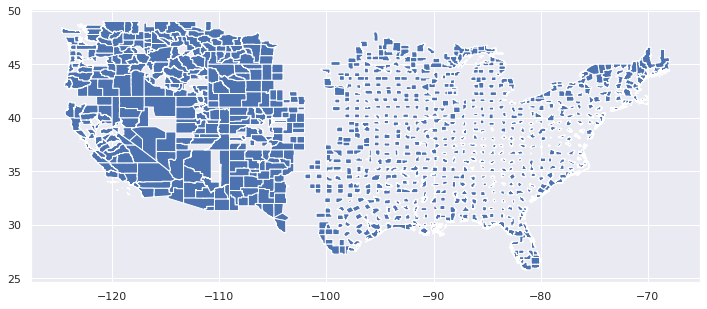

In [71]:
%%time
resdf.plot(figsize=(12,8))

In [72]:
X

,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,BLACK,AMERI_ES,ASIAN,HAWN_PI,HISPANIC,...,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,NO_FARMS07,AVG_SIZE07,CROP_ACR07,AVG_SALE07,SQMI
0,22915,36.6,23106,36.8999329266,17381.0,5047.0,64.0,22.0,13.0,406.0,...,3.09,8981.0,1028.0,6011.0,1942.0,211.0,181.0,8619.0,-99.00,626.18
1,34215,56.7,34268,56.8216488691,20112.0,13257.0,69.0,168.0,10.0,536.0,...,2.97,17004.0,3071.0,9843.0,4090.0,336.0,312.0,14335.0,19.39,603.08
2,13228,15.5,13243,15.5304851591,6788.0,6149.0,44.0,17.0,1.0,161.0,...,2.92,7093.0,1468.0,4238.0,1387.0,401.0,215.0,22692.0,19.76,852.71
3,11539,17.3,11625,17.4452631421,7648.0,3582.0,40.0,16.0,15.0,230.0,...,2.89,6478.0,1684.0,3846.0,948.0,207.0,219.0,8465.0,-99.00,666.37
4,13906,22.8,14035,22.9750523834,10097.0,3254.0,57.0,189.0,8.0,204.0,...,2.97,6735.0,1083.0,4141.0,1511.0,638.0,208.0,33501.0,175.51,610.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,43806,4.2,45509,4.33786320037,38748.0,438.0,423.0,336.0,42.0,6689.0,...,3.09,18735.0,2260.0,11872.0,4603.0,244.0,6092.0,46144.0,59.45,10491.11
1027,21294,5.0,22666,5.37493656598,18821.0,49.0,111.0,235.0,15.0,3191.0,...,2.89,12813.0,3840.0,5083.0,3890.0,180.0,294.0,18474.0,50.93,4216.98
1028,21118,10.1,21533,10.3148636932,19514.0,55.0,168.0,61.0,36.0,1855.0,...,3.19,8713.0,1045.0,5759.0,1909.0,344.0,2159.0,70210.0,78.67,2087.57
1029,8533,3.8,8668,3.86494970393,7795.0,22.0,93.0,48.0,1.0,1162.0,...,2.93,3833.0,341.0,2560.0,932.0,214.0,2195.0,46629.0,184.82,2242.72


In [73]:
#set all variables to float
for i in range(0, len(X.columns)):
    tname = X.columns[i]
    X[tname] = X[tname].astype('float')
X

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,BLACK,AMERI_ES,ASIAN,HAWN_PI,HISPANIC,...,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,NO_FARMS07,AVG_SIZE07,CROP_ACR07,AVG_SALE07,SQMI
0,22915.0,36.6,23106.0,36.899933,17381.0,5047.0,64.0,22.0,13.0,406.0,...,3.09,8981.0,1028.0,6011.0,1942.0,211.0,181.0,8619.0,-99.00,626.18
1,34215.0,56.7,34268.0,56.821649,20112.0,13257.0,69.0,168.0,10.0,536.0,...,2.97,17004.0,3071.0,9843.0,4090.0,336.0,312.0,14335.0,19.39,603.08
2,13228.0,15.5,13243.0,15.530485,6788.0,6149.0,44.0,17.0,1.0,161.0,...,2.92,7093.0,1468.0,4238.0,1387.0,401.0,215.0,22692.0,19.76,852.71
3,11539.0,17.3,11625.0,17.445263,7648.0,3582.0,40.0,16.0,15.0,230.0,...,2.89,6478.0,1684.0,3846.0,948.0,207.0,219.0,8465.0,-99.00,666.37
4,13906.0,22.8,14035.0,22.975052,10097.0,3254.0,57.0,189.0,8.0,204.0,...,2.97,6735.0,1083.0,4141.0,1511.0,638.0,208.0,33501.0,175.51,610.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,43806.0,4.2,45509.0,4.337863,38748.0,438.0,423.0,336.0,42.0,6689.0,...,3.09,18735.0,2260.0,11872.0,4603.0,244.0,6092.0,46144.0,59.45,10491.11
1027,21294.0,5.0,22666.0,5.374937,18821.0,49.0,111.0,235.0,15.0,3191.0,...,2.89,12813.0,3840.0,5083.0,3890.0,180.0,294.0,18474.0,50.93,4216.98
1028,21118.0,10.1,21533.0,10.314864,19514.0,55.0,168.0,61.0,36.0,1855.0,...,3.19,8713.0,1045.0,5759.0,1909.0,344.0,2159.0,70210.0,78.67,2087.57
1029,8533.0,3.8,8668.0,3.864950,7795.0,22.0,93.0,48.0,1.0,1162.0,...,2.93,3833.0,341.0,2560.0,932.0,214.0,2195.0,46629.0,184.82,2242.72


In [74]:
%%time
X['ELDER_SQMI'] = (X['AGE_85_UP'] + X['AGE_75_84'] + X['AGE_65_74'])/X['SQMI']

X["WHITE_SQMI"] = X["WHITE"]/X['SQMI']

X["BLACK_SQMI"] = X["BLACK"]/X['SQMI']

X["ASIAN_SQMI"] = X["ASIAN"]/X['SQMI']

#AMERI_ES Number of people identified as American Indian, Eskimo, or Aleut
X["AMERI_ES_SQMI"] = X["AMERI_ES"]/X['SQMI']

X["HAWN_PI_SQMI"] = X["HAWN_PI"]/X['SQMI']

X["HISPANIC_SQMI"] = X["HISPANIC"]/X['SQMI']

X["OTHER_SQMI"] = X["OTHER"]/X['SQMI']

X["MULT_RACE_SQMI"] = X["MULT_RACE"]/X['SQMI']

X["HISPANIC_SQMI"] = X["HISPANIC"]/X['SQMI']

X
#print (X["WHITE_SQMI"],X["BLACK_SQMI"],X["AMERI_ES_SQMI"],X["HAWN_PI_SQMI"], X["HISPANIC_SQMI"], X["OTHER_SQMI"],X["MULT_RACE_SQMI"])

CPU times: user 13.3 ms, sys: 2.95 ms, total: 16.3 ms
Wall time: 13.9 ms


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,BLACK,AMERI_ES,ASIAN,HAWN_PI,HISPANIC,...,SQMI,ELDER_SQMI,WHITE_SQMI,BLACK_SQMI,ASIAN_SQMI,AMERI_ES_SQMI,HAWN_PI_SQMI,HISPANIC_SQMI,OTHER_SQMI,MULT_RACE_SQMI
0,22915.0,36.6,23106.0,36.899933,17381.0,5047.0,64.0,22.0,13.0,406.0,...,626.18,4.640838,27.757194,8.059983,0.035134,0.102207,0.020761,0.648376,0.295442,0.324188
1,34215.0,56.7,34268.0,56.821649,20112.0,13257.0,69.0,168.0,10.0,536.0,...,603.08,9.461431,33.348809,21.982158,0.278570,0.114413,0.016582,0.888771,0.354845,0.638390
2,13228.0,15.5,13243.0,15.530485,6788.0,6149.0,44.0,17.0,1.0,161.0,...,852.71,2.769992,7.960502,7.211127,0.019936,0.051600,0.001173,0.188810,0.113755,0.154801
3,11539.0,17.3,11625.0,17.445263,7648.0,3582.0,40.0,16.0,15.0,230.0,...,666.37,2.956316,11.477107,5.375392,0.024011,0.060027,0.022510,0.345154,0.202590,0.154569
4,13906.0,22.8,14035.0,22.975052,10097.0,3254.0,57.0,189.0,8.0,204.0,...,610.88,3.617732,16.528614,5.326742,0.309390,0.093308,0.013096,0.333944,0.162061,0.330671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,43806.0,4.2,45509.0,4.337863,38748.0,438.0,423.0,336.0,42.0,6689.0,...,10491.11,0.347246,3.693413,0.041750,0.032027,0.040320,0.004003,0.637587,0.266797,0.097225
1027,21294.0,5.0,22666.0,5.374937,18821.0,49.0,111.0,235.0,15.0,3191.0,...,4216.98,0.497512,4.463147,0.011620,0.055727,0.026322,0.003557,0.756703,0.406689,0.082524
1028,21118.0,10.1,21533.0,10.314864,19514.0,55.0,168.0,61.0,36.0,1855.0,...,2087.57,0.897694,9.347710,0.026346,0.029221,0.080476,0.017245,0.888593,0.411962,0.203107
1029,8533.0,3.8,8668.0,3.864950,7795.0,22.0,93.0,48.0,1.0,1162.0,...,2242.72,0.672398,3.475690,0.009810,0.021403,0.041468,0.000446,0.518121,0.166316,0.089623


In [75]:
X = X.drop(['POP2010',  'POP2012', 'POP12_SQMI', 'WHITE', 'BLACK',
       'AMERI_ES', 'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE',
       'MALES', 'FEMALES', 'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19',
       'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64',
       'AGE_65_74', 'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'MED_AGE_M',
       'MED_AGE_F', 'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F',
       'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES',
       'AVE_FAM_SZ', 'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC',
       'NO_FARMS07', 'AVG_SIZE07', 'CROP_ACR07', 'AVG_SALE07', 'SQMI'], axis=1)
X
#'POP10_SQMI'

,POP10_SQMI,ELDER_SQMI,WHITE_SQMI,BLACK_SQMI,ASIAN_SQMI,AMERI_ES_SQMI,HAWN_PI_SQMI,HISPANIC_SQMI,OTHER_SQMI,MULT_RACE_SQMI
0,36.6,4.640838,27.757194,8.059983,0.035134,0.102207,0.020761,0.648376,0.295442,0.324188
1,56.7,9.461431,33.348809,21.982158,0.278570,0.114413,0.016582,0.888771,0.354845,0.638390
2,15.5,2.769992,7.960502,7.211127,0.019936,0.051600,0.001173,0.188810,0.113755,0.154801
3,17.3,2.956316,11.477107,5.375392,0.024011,0.060027,0.022510,0.345154,0.202590,0.154569
4,22.8,3.617732,16.528614,5.326742,0.309390,0.093308,0.013096,0.333944,0.162061,0.330671
...,...,...,...,...,...,...,...,...,...,...
1026,4.2,0.347246,3.693413,0.041750,0.032027,0.040320,0.004003,0.637587,0.266797,0.097225
1027,5.0,0.497512,4.463147,0.011620,0.055727,0.026322,0.003557,0.756703,0.406689,0.082524
1028,10.1,0.897694,9.347710,0.026346,0.029221,0.080476,0.017245,0.888593,0.411962,0.203107
1029,3.8,0.672398,3.475690,0.009810,0.021403,0.041468,0.000446,0.518121,0.166316,0.089623


### Run correlation analysis

In [76]:
#set all variables to float
for i in range(0, len(X.columns)):
    tname = X.columns[i]
    X[tname] = X[tname].astype('float')
X


,POP10_SQMI,ELDER_SQMI,WHITE_SQMI,BLACK_SQMI,ASIAN_SQMI,AMERI_ES_SQMI,HAWN_PI_SQMI,HISPANIC_SQMI,OTHER_SQMI,MULT_RACE_SQMI
0,36.6,4.640838,27.757194,8.059983,0.035134,0.102207,0.020761,0.648376,0.295442,0.324188
1,56.7,9.461431,33.348809,21.982158,0.278570,0.114413,0.016582,0.888771,0.354845,0.638390
2,15.5,2.769992,7.960502,7.211127,0.019936,0.051600,0.001173,0.188810,0.113755,0.154801
3,17.3,2.956316,11.477107,5.375392,0.024011,0.060027,0.022510,0.345154,0.202590,0.154569
4,22.8,3.617732,16.528614,5.326742,0.309390,0.093308,0.013096,0.333944,0.162061,0.330671
...,...,...,...,...,...,...,...,...,...,...
1026,4.2,0.347246,3.693413,0.041750,0.032027,0.040320,0.004003,0.637587,0.266797,0.097225
1027,5.0,0.497512,4.463147,0.011620,0.055727,0.026322,0.003557,0.756703,0.406689,0.082524
1028,10.1,0.897694,9.347710,0.026346,0.029221,0.080476,0.017245,0.888593,0.411962,0.203107
1029,3.8,0.672398,3.475690,0.009810,0.021403,0.041468,0.000446,0.518121,0.166316,0.089623


In [77]:
for i in range(0, len(X.columns)):
    tname = X.columns[i]
    print (tname)

POP10_SQMI
ELDER_SQMI
WHITE_SQMI
BLACK_SQMI
ASIAN_SQMI
AMERI_ES_SQMI
HAWN_PI_SQMI
HISPANIC_SQMI
OTHER_SQMI
MULT_RACE_SQMI


In [82]:
from scipy.stats import spearmanr
sp_r = []
for factor in X.columns:
    s = spearmanr(X[factor], y)
    sp_r.append((factor, s.correlation, s.pvalue))
sp_r.sort(key = lambda x: -x[1])
sp_r

[('POP10_SQMI', 0.5586844151991661, 1.1094911052383144e-85),
 ('ELDER_SQMI', 0.549204935988642, 2.742906035436939e-82),
 ('BLACK_SQMI', 0.5429750936863974, 4.069767632729371e-80),
 ('WHITE_SQMI', 0.5398810831266195, 4.6895105009375505e-79),
 ('ASIAN_SQMI', 0.536720949324659, 5.546596956480025e-78),
 ('MULT_RACE_SQMI', 0.5223755934510639, 2.978593935371096e-73),
 ('OTHER_SQMI', 0.5047129414871868, 9.889654745744084e-68),
 ('HISPANIC_SQMI', 0.491035716233212, 1.1308823616964782e-63),
 ('HAWN_PI_SQMI', 0.47212667067569974, 2.3412536668628446e-58),
 ('AMERI_ES_SQMI', 0.34390261316605975, 5.3893007602350215e-30)]

03/14
[('POP10_SQMI', 0.5586844151991661, 1.1094911052383144e-85),
 ('ELDER_SQMI', 0.549204935988642, 2.742906035436939e-82),
 ('BLACK_SQMI', 0.5429750936863974, 4.069767632729371e-80),
 ('WHITE_SQMI', 0.5398810831266195, 4.6895105009375505e-79),
 ('ASIAN_SQMI', 0.536720949324659, 5.546596956480025e-78),
 ('MULT_RACE_SQMI', 0.5223755934510639, 2.978593935371096e-73),
 ('OTHER_SQMI', 0.5047129414871868, 9.889654745744084e-68),
 ('HISPANIC_SQMI', 0.491035716233212, 1.1308823616964782e-63),
 ('HAWN_PI_SQMI', 0.47212667067569974, 2.3412536668628446e-58),
 ('AMERI_ES_SQMI', 0.34390261316605975, 5.3893007602350215e-30)]

03/21#

[('BLACK_SQMI', 0.6917077814626976, 1.0198382914092609e-168),
 ('POP10_SQMI', 0.6776332309820262, 1.993884385879359e-159),
 ('ELDER_SQMI', 0.675607609113504, 3.928802708002582e-158),
 ('WHITE_SQMI', 0.6588301709398245, 8.512388016344692e-148),
 ('ASIAN_SQMI', 0.6246408874955219, 1.1361332288546726e-128),
 ('MULT_RACE_SQMI', 0.6239749586681521, 2.537658774206885e-128),
 ('OTHER_SQMI', 0.5878005062396829, 1.4569601590857686e-110),
 ('HISPANIC_SQMI', 0.5764469031688644, 1.9348428617767422e-105),
 ('HAWN_PI_SQMI', 0.5545632713638401, 4.109762550926945e-96),
 ('AMERI_ES_SQMI', 0.3736457641384199, 2.1222443880339505e-40)]
​


03/28

[('BLACK_SQMI', 0.7001380572647901, 2.8194764448169923e-175),
 ('POP10_SQMI', 0.6943922213901236, 2.8830636921883564e-171),
 ('ELDER_SQMI', 0.692366928800425, 7.090371977575898e-170),
 ('WHITE_SQMI', 0.678331063629215, 1.5174044820471045e-160),
 ('MULT_RACE_SQMI', 0.6398775931886377, 1.819508582674843e-137),
 ('ASIAN_SQMI', 0.6384435083557001, 1.1405619153389083e-136),
 ('OTHER_SQMI', 0.5908358026597001, 1.9590791990947226e-112),
 ('HISPANIC_SQMI', 0.5806486642255209, 9.262725867953226e-108),
 ('HAWN_PI_SQMI', 0.5622714949783024, 9.868517442170693e-100),
 ('AMERI_ES_SQMI', 0.3788869213512436, 9.469744872164464e-42)]

04/04
[('BLACK_SQMI', 0.7272696730640588, 9.430862861870105e-196),
 ('POP10_SQMI', 0.6907086181354718, 6.917285662419155e-169),
 ('ELDER_SQMI', 0.6879364647025594, 5.174833361932242e-167),
 ('WHITE_SQMI', 0.6705537819803047, 1.0002875388336723e-155),
 ('MULT_RACE_SQMI', 0.6302966139985461, 2.4896949096811588e-132),
 ('ASIAN_SQMI', 0.629425078796414, 7.322198958258121e-132),
 ('OTHER_SQMI', 0.6023573892353719, 5.035487660218582e-118),
 ('HISPANIC_SQMI', 0.5903814293456575, 2.5755549475711896e-112),
 ('HAWN_PI_SQMI', 0.5447450398123821, 1.3125659644807062e-92),
 ('AMERI_ES_SQMI', 0.35929856501371993, 1.8614415939698371e-37)]



### 

